# Geopandas

[State Data](https://www.weather.gov/gis/USStates)
[Cities Data](https://simplemaps.com/data/us-cities)

### Coordinates Reference System

[Set CRS](https://jorisvandenbossche.github.io/blog/2020/02/11/geopandas-pyproj-crs/)

In [12]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [24]:
# Load as Geopandas DataFrame
states = gpd.read_file("maps/eeuu.shp")
states.head()

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."


In [29]:
states.describe()

,LON,LAT
count,57.000000,57.000000
mean,-83.839019,36.340367
std,50.541465,11.992700
min,-170.372150,-14.264860
25%,-100.469350,34.293230
50%,-86.826760,38.998550
75%,-76.785880,42.947960
max,145.157960,64.240190


In [27]:
states.loc[states["LON"] == states["LON"].max()]

,STATE,NAME,FIPS,LON,LAT,geometry
53,GU,Guam,66,145.15796,14.57384,"MULTIPOLYGON (((144.67462 13.23862, 144.67376 ..."
54,MP,Northern Marianas,69,145.15796,14.57384,"MULTIPOLYGON (((145.13115 14.13565, 145.13118 ..."


**Watch longitude and latitude order! First longitude and then latitude.**

In [73]:
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

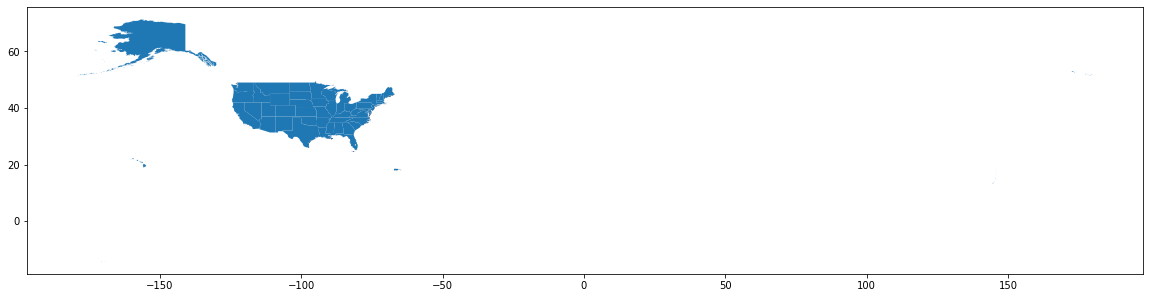

In [84]:
# Look crs bounds area information 
states.plot(figsize=(20,20))

## Filter

In [37]:
states.loc[states["NAME"].str.contains("C")]

,STATE,NAME,FIPS,LON,LAT,geometry
5,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
6,CO,Colorado,08,-105.54783,38.99855,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
7,CT,Connecticut,09,-72.72623,41.62196,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
8,DC,District of Columbia,11,-77.01464,38.90932,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
26,NC,North Carolina,37,-79.37865,35.54369,"MULTIPOLYGON (((-77.50814 34.45068, -77.50844 ..."
52,SC,South Carolina,45,-80.89899,33.93574,"MULTIPOLYGON (((-82.38064 35.20132, -82.37949 ..."


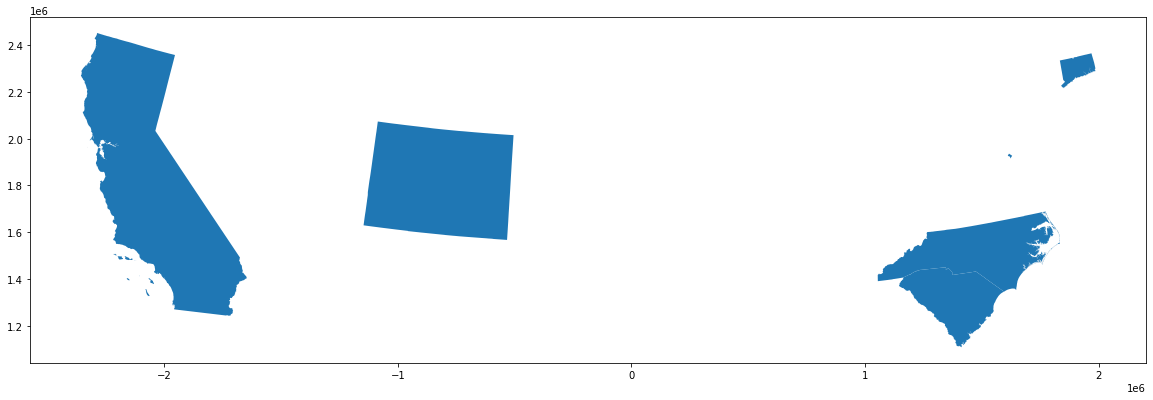

In [86]:
states.loc[states["NAME"].str.contains("C")].to_crs(epsg=5071).plot(figsize=(20,20))

## Plot latitude and longitude data

In [49]:
# Load csv file by pandas
cities = pd.read_csv("maps/cities.csv")
cities.columns

Index(['city', 'city_ascii', 'state_id', 'state_name', 'county_fips',
       'county_name', 'county_fips_all', 'county_name_all', 'lat', 'lng',
       'population', 'density', 'source', 'military', 'incorporated',
       'timezone', 'ranking', 'zips', 'id'],
      dtype='object')

In [43]:
# Filter cities in California
cities = cities.loc[cities["state_name"] == "California"]
cities

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
12831,El Dorado Hills,El Dorado Hills,CA,California,6017,El Dorado,06017,El Dorado,38.6750,-121.0490,45104.0,359.0,polygon,False,False,America/Los_Angeles,3,95672 95762 95682,1840017565
12832,Lemon Cove,Lemon Cove,CA,California,6107,Tulare,06107,Tulare,36.3790,-119.0312,232.0,107.0,polygon,False,True,America/Los_Angeles,3,93244,1840074315
12833,Dillon Beach,Dillon Beach,CA,California,6041,Marin,06041,Marin,38.2436,-122.9560,156.0,20.0,polygon,False,False,America/Los_Angeles,3,94929 94971,1840018883
12834,Patterson Tract,Patterson Tract,CA,California,6107,Tulare,06107,Tulare,36.3795,-119.2956,2320.0,619.0,polygon,False,True,America/Los_Angeles,3,93291,1840042286
12835,Redcrest,Redcrest,CA,California,6023,Humboldt,06023,Humboldt,40.3987,-123.9474,36.0,23.0,polygon,False,False,America/Los_Angeles,3,95569,1840026325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14331,Baker,Baker,CA,California,6071,San Bernardino,06071,San Bernardino,35.2769,-116.0718,626.0,89.0,polygon,False,False,America/Los_Angeles,3,92309,1840025801
14332,Gardena,Gardena,CA,California,6037,Los Angeles,06037,Los Angeles,33.8944,-118.3073,60224.0,3989.0,polygon,False,True,America/Los_Angeles,2,90247 90249,1840020482
14333,Foster City,Foster City,CA,California,6081,San Mateo,06081,San Mateo,37.5553,-122.2659,34412.0,3500.0,polygon,False,True,America/Los_Angeles,2,94404,1840020302
14334,Gonzales,Gonzales,CA,California,6053,Monterey,06053,Monterey,36.5060,-121.4430,8466.0,1731.0,polygon,False,True,America/Los_Angeles,3,93926,1840020355


In [63]:
from shapely.geometry import Point

# Generete shapes from cities latitude and longitude
points = cities.apply(lambda row: Point(row["lng"], row["lat"]), axis=1)
points.head()

0    POINT (-122.3921 46.9994)
1    POINT (-121.0989 47.2507)
2    POINT (-117.9713 47.3048)
3    POINT (-122.5968 47.3352)
4     POINT (-122.092 48.0639)
dtype: object

We can't simply add this new point Geograpy column to our DataFrame, they to different types. We have to create a new GeoDataFrame join them.

In [71]:
# Create a GeoDataframe with Dataframe and adding geometry
geocities = gpd.GeoDataFrame(cities, crs="EPSG:4326", geometry=points)
geocities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id,geometry
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075,POINT (-122.39210 46.99940)
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840019842,POINT (-121.09890 47.25070)
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840021107,POINT (-117.97130 47.30480)
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840019855,POINT (-122.59680 47.33520)
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840041959,POINT (-122.09200 48.06390)


We can do it directly `gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=gpd.points_from_xy(df.Longitude, df.Latitude))`

(-2391589.4886041754,
 -1611123.0830684889,
 1181850.4596637576,
 2513237.4252579804)

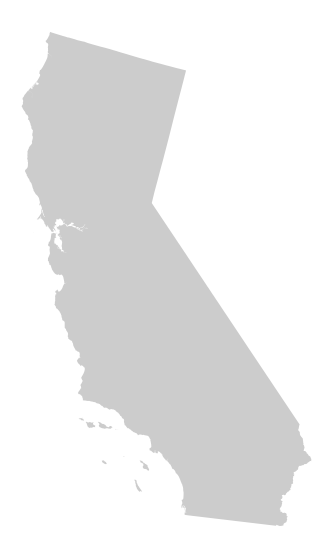

In [91]:
ax = states.loc[states["NAME"].str.contains("California")].to_crs(epsg=5071).plot(
    figsize=(10,10), color="grey", alpha=0.4
)
ax.axis("off")